In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.preprocessing import OneHotEncoder


In [2]:
df = pd.read_csv('updated.csv')

In [3]:
df['description'] = df['description'].str.replace('$', '', regex=False)

In [4]:
df = df['description']

In [5]:
des = []
for i in df:
    des.append(i)

In [6]:
# Add des data into description data
descriptions = des


# One Hot Encoding Method

/home/codetrade/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/codetrade/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.15


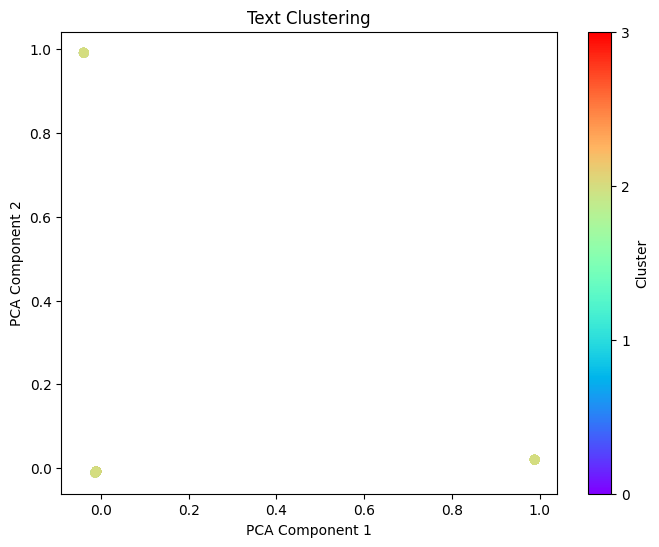

In [7]:
# One hot encoding method

# Vectorization techniques
vectorizers = {
    "One-Hot Encoding": OneHotEncoder(sparse=False, handle_unknown='ignore')
}

for vectorizer_name, vectorizer in vectorizers.items():
    # Preprocessing and feature extraction
    if vectorizer_name == "One-Hot Encoding":
        # Perform one-hot encoding
        X = vectorizer.fit_transform([[description] for description in descriptions])

# Dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, kmeans.labels_)

print(f"Silhouette Score: {silhouette_avg*100:.2f}")

# Map cluster labels to categories
cluster_categories = {
    0: "Company",
    1: "Hub",
    2: "Educational institution",
    3: "Governmental organization"
}

# Visualize the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='rainbow')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Text Clustering')
plt.colorbar(scatter, ticks=range(len(cluster_categories)), label='Cluster')
plt.show()

# Word2vec method

/home/codetrade/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 43.64


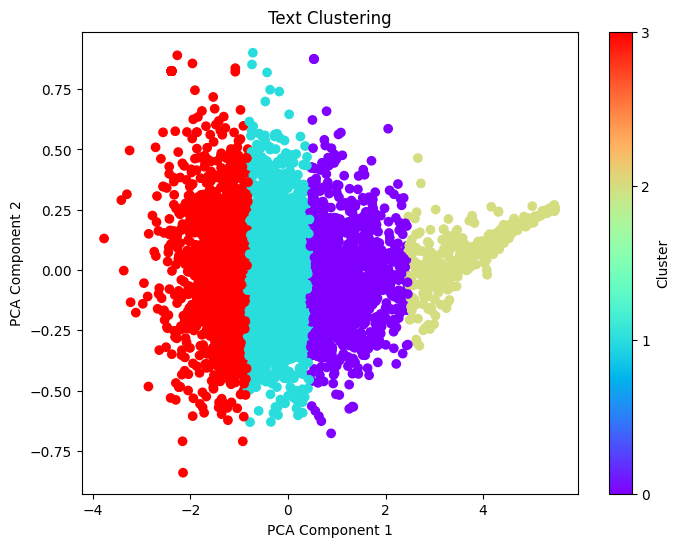

In [8]:

# Preprocessing and feature extraction
vectorizers = {
    "Word2Vec": Word2Vec(sentences=[desc.split() for desc in descriptions], min_count=1, vector_size=100)
}

for vectorizer_name, vectorizer in vectorizers.items():
    # Preprocessing and feature extraction
    if vectorizer_name == "Word2Vec":
        X = [vectorizer.wv[desc.split()].mean(axis=0) for desc in descriptions]
        X = np.vstack(X)
    else:
        X = vectorizer.fit_transform(descriptions)

# Dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, kmeans.labels_)

print(f"Silhouette Score: {silhouette_avg*100:.2f}")

# Map cluster labels to categories
cluster_categories = {
    0: "Company",
    1: "Hub",
    2: "Educational institution",
    3: "Governmental organization"
}

# Visualize the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='rainbow')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Text Clustering')
plt.colorbar(scatter, ticks=range(len(cluster_categories)), label='Cluster')
plt.show()

# Bag of Words OR Countvectorizer

/home/codetrade/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 2.27


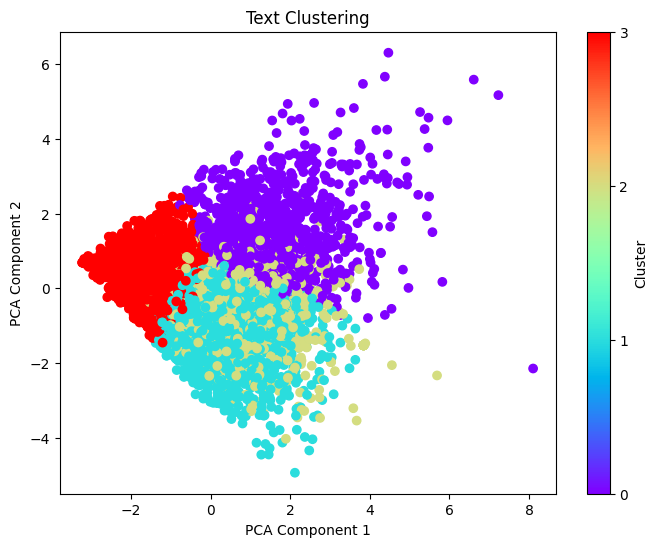

In [9]:
# Bag of words
# Vectorization techniques
vectorizers = {
    "Bag of Words (BoW)": CountVectorizer()
}

for vectorizer_name, vectorizer in vectorizers.items():
    # Preprocessing and feature extraction
    if vectorizer_name == "Bag of Words (BoW)":
        X = vectorizer.fit_transform(descriptions).toarray()

# Dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, kmeans.labels_)

print(f"Silhouette Score: {silhouette_avg*100:.2f}")

# Map cluster labels to categories
cluster_categories = {
    0: "Company",
    1: "Hub",
    2: "Educational institution",
    3: "Governmental organization"
}

# Visualize the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='rainbow')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Text Clustering')
plt.colorbar(scatter, ticks=range(len(cluster_categories)), label='Cluster')
plt.show()

In [10]:
# a={}
# cluster_label = []
# # Print the cluster labels, corresponding categories, and descriptions
# for label, description in zip(kmeans.labels_, descriptions):
#     print("Cluster:", label, "| Category:", cluster_categories[label], "| Description:", description)
#     a[description] = str("Class is ") + cluster_categories[label]
#     cluster_label.append(cluster_categories[label])
    

In [11]:
# cluster_label